In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_file = 'xsum-gen-model=mistral-7b-v0.1-n=5000.csv'
df = pd.read_csv(input_file)
df.head(10)

,text,label
0,"In Wales, councils are responsible for funding...",0
1,"In Wales, councils are responsible for funding...",1
2,"Up to 100,000 youngsters will be eligible for ...",0
3,"Up to 100,000 youngsters will be eligible for ...",1
4,Middlesbrough and Brighton face each other on ...,0
5,Middlesbrough and Brighton face each other on ...,1
6,"Money allocated to children's centres, which p...",0
7,"Money allocated to children's centres, which p...",1
8,"Both sides have overlapping claims in the sea,...",0
9,"Both sides have overlapping claims in the sea,...",1


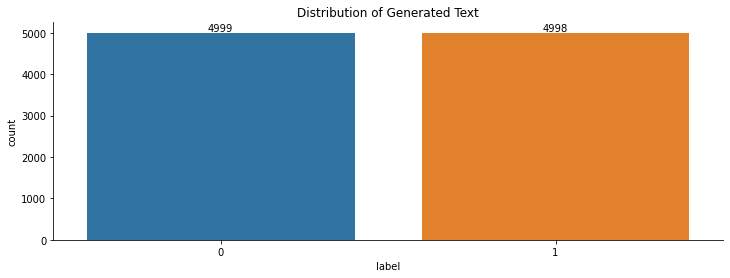

In [3]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df, x="label")

abs_values = df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

In [4]:
# Shuffling the data
shuffled_data = df.sample(frac=1, random_state=21)

In [5]:
shuffled_data.head()

,text,label
2146,He said he understood from Wikileaks spokesman...,0
3744,A 25ft (7.6m) model triceratops had to be remo...,0
3895,"It's a tiny claim on his greatness, the pleasu...",1
9864,"The 35-year-old agreed a one-year contract, wi...",1
8416,The Bluebirds failed to take their chances as ...,0


### Implementation of TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Rajpal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
# Converting text to numerical form
X = vectorizer.fit_transform(shuffled_data["text"])
Y = shuffled_data["label"]

In [8]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=10)

In [9]:
np.size(y_train)

7497

In [10]:
np.size(y_test)

2500

In [11]:
counts = np.bincount(y_test)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 1236
Number of 1s: 1264


### Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [13]:
# Model Evaluation
y_pred = classifier_NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

In [14]:
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 49.36%
Precision: 49.91%
Recall: 45.33%
F1 Score: 47.51%


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [16]:
# Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred)  * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 56.96%
Precision: 59.51%
Recall: 46.52%
F1 Score: 52.22%


In [17]:
# Changing the number of trees and the criterion

classifier_gini = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = classifier_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred)  * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 61.92%
Precision: 62.42%
Recall: 62.03%
F1 Score: 62.22%


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state=42)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
y_pred = classifier_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 61.32%
Precision: 61.97%
Recall: 60.84%
F1 Score: 61.40%
